# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv("../data/PostTypeAnalysisDateset.csv")
df.head()

,post_date,entity_id,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate
0,1/2/20 17:10,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NaN,36023.36585,123,3,42,0.000693
1,1/2/20 17:46,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NaN,23402.68323,4,0,0,0.000017
2,10/9/20 16:06,4AAFEFB838974FDCA41932C4D32FD52A,2102820.0,False,False,NaN,204639.92030,24,1,2,0.000013
3,10/9/20 16:08,4AAFEFB838974FDCA41932C4D32FD52A,2102820.0,False,False,NaN,208872.73630,91,1,2,0.000045
4,10/10/20 13:00,4A3372EBDC9C484AA8503A96CD14B858,1023570.0,False,False,NaN,136020.57130,465,9,2,0.000465


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15141 entries, 0 to 15140
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_date            15141 non-null  object 
 1   entity_id            15141 non-null  object 
 2   followers            15127 non-null  float64
 3   is_picture           15141 non-null  bool   
 4   is_video             15141 non-null  bool   
 5   video_duration_secs  1989 non-null   float64
 6   impressions          15127 non-null  float64
 7   likes                15141 non-null  int64  
 8   shares               15141 non-null  int64  
 9   replies              15141 non-null  int64  
 10  engagement_rate      15141 non-null  float64
dtypes: bool(2), float64(4), int64(3), object(2)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

post_date                  0
entity_id                  0
followers                 14
is_picture                 0
is_video                   0
video_duration_secs    13152
impressions               14
likes                      0
shares                     0
replies                    0
engagement_rate            0
dtype: int64

In [5]:
df[df.followers.isnull()]

,post_date,entity_id,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate
287,9/16/20 12:05,4AAFEFB838974FDCA41932C4D32FD52A,NaN,False,False,NaN,NaN,604,3,3,0.0
3940,9/16/20 14:00,4AAFEFB838974FDCA41932C4D32FD52A,NaN,False,True,28.612,NaN,1495,79,20,0.0
3943,9/16/20 17:59,4AAFEFB838974FDCA41932C4D32FD52A,NaN,True,False,NaN,NaN,7356,461,70,0.0
3944,9/16/20 17:59,4AAFEFB838974FDCA41932C4D32FD52A,NaN,False,False,NaN,NaN,344,15,4,0.0
3945,9/16/20 20:52,4AAFEFB838974FDCA41932C4D32FD52A,NaN,False,False,NaN,NaN,25,0,0,0.0
3946,9/16/20 20:55,4AAFEFB838974FDCA41932C4D32FD52A,NaN,False,True,25.250,NaN,1192,116,13,0.0
3947,9/16/20 21:28,4AAFEFB838974FDCA41932C4D32FD52A,NaN,False,False,NaN,NaN,34,0,4,0.0
4018,9/16/20 18:34,4AAFEFB838974FDCA41932C4D32FD52A,NaN,False,False,NaN,NaN,63,0,0,0.0
4336,8/8/20 2:41,4AAFEFB838974FDCA41932C4D32FD52A,NaN,False,False,NaN,NaN,0,0,0,0.0
7822,7/27/20 16:56,4AAFEFB838974FDCA41932C4D32FD52A,NaN,True,False,NaN,NaN,0,0,0,0.0


# Look into NaNs more
- for 14 posts, followers and impressions are NaN so probably drop them
- a-lot of video duration is NaN, probably fine I reckon it's because video = False

In [6]:
df[df.is_video == False].shape # yeah that's why

(13152, 11)

# How do videos do vs non-videos?

In [7]:
df.is_video.value_counts()

False    13152
True      1989
Name: is_video, dtype: int64

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

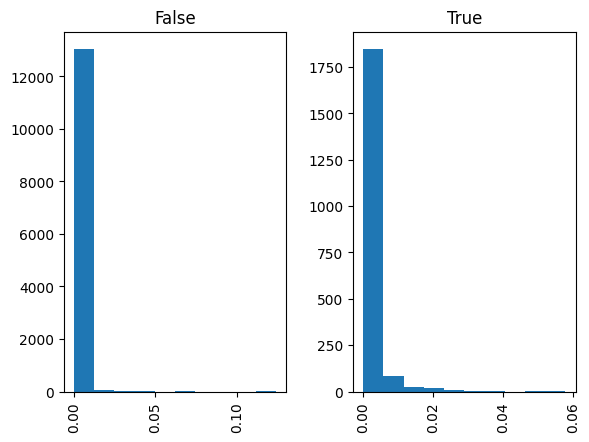

In [8]:
df.engagement_rate.hist(by=df.is_video)

(<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>)

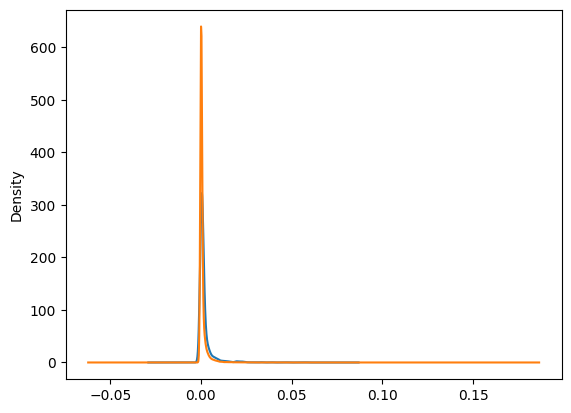

In [17]:
df[df.is_video].engagement_rate.plot.density(), df[~df.is_video].engagement_rate.plot.density()

In [18]:
df.corr()

,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate
followers,1.000000,0.016508,0.100099,0.106794,0.724790,0.350091,0.173889,0.150352,0.007454
is_picture,0.016508,1.000000,-0.260432,NaN,0.095042,0.099921,0.069715,0.010118,0.092886
is_video,0.100099,-0.260432,1.000000,NaN,0.135577,0.091428,0.079929,-0.004282,0.101643
video_duration_secs,0.106794,NaN,NaN,1.000000,0.189965,0.190438,0.153070,0.070784,0.218934
impressions,0.724790,0.095042,0.135577,0.189965,1.000000,0.882955,0.558378,0.335227,0.560186
likes,0.350091,0.099921,0.091428,0.190438,0.882955,1.000000,0.644512,0.386018,0.766413
shares,0.173889,0.069715,0.079929,0.153070,0.558378,0.644512,1.000000,0.334081,0.479210
replies,0.150352,0.010118,-0.004282,0.070784,0.335227,0.386018,0.334081,1.000000,0.194163
engagement_rate,0.007454,0.092886,0.101643,0.218934,0.560186,0.766413,0.479210,0.194163,1.000000
